# TP - 1. Introduction à scikit-learn - classification

Dans ce notebook, vous allez apprendre :
* à vous servir d'un notebook Jupyter pour garder une trace de l'analyse de vos données ;
* à vous familiariser avec la librairie scikit-learn;
* à developper un premier algorithme de classification.

Ce noteboook utilise les librairies suivantes :
* python 3.7.7
* numpy 1.18.4
* matplotlib 3.2.1
* scikit-learn 0.23.1

Pour vérifier quelles versions de ces librairies vous utilisez, faites tourner la cellue ci-dessous en cliquant dessus puis en cliquant sur le bouton "Play" dans le menu au-dessus de cette fenêtre, ou en tapant Shift+Enter.

In [1]:
import sys
print(sys.version)

import numpy
print(numpy.__version__)

import matplotlib
print(matplotlib.__version__)

import sklearn
print(sklearn.__version__)

3.7.8 | packaged by conda-forge | (default, Nov 17 2020, 23:02:53) [MSC v.1916 64 bit (AMD64)]
1.18.5
3.3.3
0.23.2


# 1.  Le notebook Jupyter

Jupyter est une application web qui vous permet de créer et partager des documents appelés _notebooks_ (tels que ce notebook .ipynb) qui contient du code modifiable et exécutable, des visualisations, et du texte explicatoire qui peut être formaté avec une syntaxe markdown simple et contenir des équations.

Quelques éléments concernant l'utilisation des notebooks Jupyter :
* Chaque bloc éditable est contenu dans une cellule (_cell_). Un cellule peut contenit du texte brut (_raw text_), du code, ou du texte formatté avec la syntaxe markdown, comme cette cellule. Pour plus d'information sur la syntaxe markdown, suivez le [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) !
* Pour exécuter une cellule, il suffit de cliquer dessus et de taper Shift+Enter (ou d'utiliser le bouton Play dans la barre de menu).
* Pour créer une nouvelle cellule vide en-dessous de celle que vous allez exécuter, utilisez Alt+Enter au lieu de Shift+Enter.
* Le menu Insert vous permet aussi d'insérer de nouvelles cellules avant ou après la cellue courante.
* Si le notebook ne répond plus, vous pouvez le redémarrer par le menu Kernel --> Restart.

Quelques éléments concernant l'utilisation d'un notebook Jupyter avec Python :
* Une cellule de code Python se comporte comme un shell Python interactif (et en particulier comme ipython, sur lequel est basé Jupyter). En particulier : 
  * Tabulation permet d'auto-compléter le mot-clé que vous avez commencé à taper
  * Taper un point d'interrogation après le nom d'un objet charge l'aide interactive pour cette fonction.
* Jupyter a des commandes Python spéciales (des raccourcis, en quelque sorte) qui s'appellent des _magics_. Par exemple, `%bash` permet d'exécuter du code bash (donc comme si vous étiez dans un terminal), `%paste` permet de coller un block de code précédemment copié (depuis le notebook ou une autre application) en conservant son formatage (et en particulier les indentations), et `%matplotlib inline` permet d'importer la librairie de visualisation de matplotlib et d'afficher les graphiques créés non pas dans une nouvelle fenêtre mais à l'intérieur du notebook. Vous trouverez une liste complète de _magics_ sur http://ipython.readthedocs.io/en/stable/interactive/magics.html 


### Ressources 
* Pour en savoir plus sur le shell python interactif : http://ipython.readthedocs.io/en/stable/interactive/tutorial.html
* Pour en savoir plus sur Jupyter : https://jupyter.org/
* Python et Python Scientifique : http://www.scipy-lectures.org/
* Pour une introduction rapide aux différences entre shell python, shell python interactif, et notebook : https://www.youtube.com/watch?v=ULzWaZQa1Dc (en français)

In [2]:
# On importe les packages classiques de calcul et de visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gestion des données

Ce TP a pour but de vous familiariser avec scikit-learn, d'apprendre et d'utiliser les modèles proposés par cette librairie.

On utilisera une version simplifiée du classique jeu de donnée MNIST, digits, dont les élements sont des images de chiffres tracés à la main.
Ici chaque image est de dimension `8x8`.
Importons le.

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


L'attribut `data` d'un dataset sklearn a systématiquement les dimensions `(n_samples, n_features)`.
Ici une ligne correspond donc à une image "aplatie". On peut les afficher en restructurant ce vecteur grace à la méthode `.reshape` d'un tableau numpy.

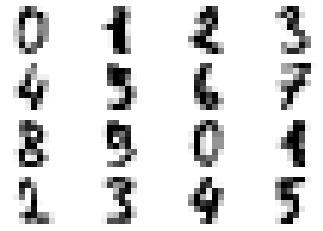

In [4]:
# Plot des 16 premiers éléments du dataset.
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(digits.data[i,:].reshape((8,8)), cmap='Greys')
    ax.set_axis_off()

`data` et `target` sont deux des attributs de ce jeu de données.
Il est possible de lister les attributs et méthodes d'une classe avec `dir(object)`.

**Question:**

> Y avait-il un moyen plus simple d'afficher les images ?

**Réponse**:


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


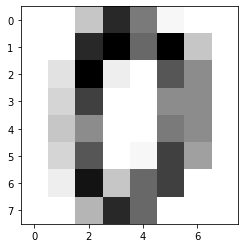

In [11]:
print(dir(digits))
plt.imshow(digits.images[0],  cmap='Greys')

Le but sera ici d'apprendre à classifier ces image, les classes étant les numéros représentés (10 classes donc).

Pour évaluer le classifieur, il nous faut un jeu de donné de test indépendant de celui d'entrainement.
On peut séparer aléatoirement le jeu de données en un `train` et un `test` grâce à [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, 
                                                                    test_size=0.3, random_state=84)

Text(0.5, 0, 'train labels')

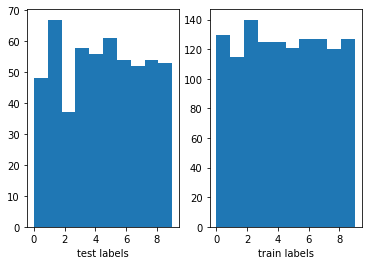

In [13]:
plt.subplot(1, 2, 1)
plt.hist(label_test)
plt.xlabel('test labels')
plt.subplot(1, 2, 2)
plt.hist(label_train)
plt.xlabel('train labels')

Si la séparation est faite totalement aléatoirement et que la base de donnée n'est pas suffisamment grande, on peut avoir une répartition inégale des labels au sein du `test` et du `train`. 
Cela peut affecter les performances des modèles. On va en général chercher à séparer le jeu de données en conservant 
dans le `train` et le `test` la même proportion de labels que dans le jeu de données initial : c'est la stratification.

In [14]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, 
                                                                    test_size=0.3, random_state=84, stratify=digits.target)

Text(0.5, 0, 'train labels')

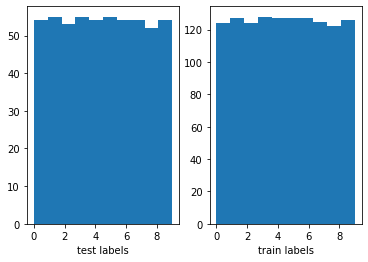

In [15]:
plt.subplot(1, 2, 1)
plt.hist(label_test)
plt.xlabel('test labels')
plt.subplot(1, 2, 2)
plt.hist(label_train)
plt.xlabel('train labels')

## Apprentissage d'un classifieur

On peut maintenant entrainer un modèle sur le jeu d'entrainement (`data_train`, `label_train`) et le tester sur (`data_test`, `label_test`).

Les modèles de sklearn sont implémentés par une classe héritée de `BaseEstimator`.
On les utilise tous de la même manière, en 3 étapes:

* Instancier le modèle `model(**kwargs)`
* Apprendre le modèle sur le jeu d'entrainement avec la méthode `fit`: `model.fit(X=data, y=ground_truth)`.
* Utiliser le modèle, avec les méthodes `predict`, `score` par exemple: `model.predict(X=data_test)`

Rappel : on peut utiliser `dir(object)` pour lister les méthodes/attributs disponibles, et `help(object.methode)` pour afficher la doc de cette méthode.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Instanciez, apprennez et testez un classifieur des 5-plus-proches-voisins.
knc = KNeighborsClassifier(5)
knc.fit(X=data_train, y=label_train)
print(knc.score(data_test, label_test))
print(accuracy_score(label_test, knc.predict(data_test)))


0.9833333333333333
0.9833333333333333


Il est possible de créer des pipelines d'execution grace à `sklearn.pipeline.Pipeline`.
De même qu'un autre modèle, une pipeline a des méthodes `fit`, `predict` etc...

Implémentons la régression logistique régularisée, avec comme paramètre de régularisation $\frac{1}{C} = \frac{1}{2}$.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

# Apprenez et testez la regression logistique régularisée (précedeée d'une normalisation des données):
pip.fit(X=data_train, y=label_train)
pip.score(data_test, label_test)


0.9648148148148148

Regardons de plus près quelques exemples de succès et d'échec de l'algorithme 5-NNC

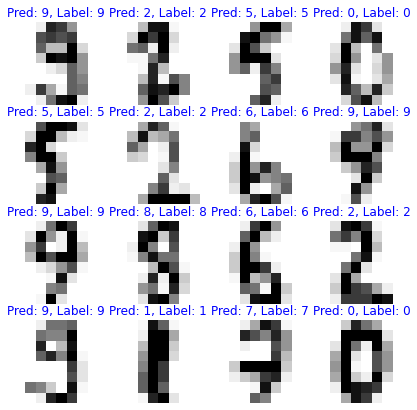

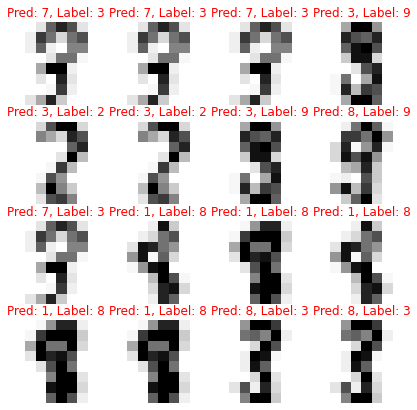

In [21]:
np.random.seed(84)
## instanciez `preds` avec les prédictions du 5-NNC sur le set de test.
preds = knc.predict(data_test)

success = np.array(preds) == np.array(label_test)   

# Quelques cas de prédictions justes:
data_s, pred_s, label_s =data_test[success,:], preds[success], label_test[success]
sample = np.random.choice(len(pred_s), size=16) # Echantillon aléatoire de 16 succès
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    pred, ground_truth = pred_s[sample][i], label_s[sample][i]
    ax.imshow(data_s[sample,:][i,:].reshape((8,8)), cmap='Greys')
    ax.set_title('Pred: {}, Label: {}'.format(pred, ground_truth), color='b')
    ax.set_axis_off()

# Quelques cas de prédictions fausses:
data_f, pred_f, label_f =data_test[~success,:], preds[~success], label_test[~success]
sample = np.random.choice(len(pred_f),size=16)
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    pred, ground_truth = pred_f[sample][i], label_f[sample][i]
    ax.imshow(data_f[sample,:][i,:].reshape((8,8)), cmap='Greys')
    ax.set_title('Pred: {}, Label: {}'.format(pred, ground_truth), color='r')
    ax.set_axis_off()

## Evaluation d'un algorithme de classification

A l'oeil, sur un certain nombre d'échantillons ça semble assez bien fonctionner.
On peut évaluer plus précisément les performances de cet algo. Pour ça, on va utiliser le module [`metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) de sklearn.
On y trouve déjà implémenté une série de métriques utiles: [`accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score), [`auc_roc`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

Vous noterez que tous les classifieurs de sklearn ont la méthode `score` qui calcule le score `accuracy` moyen sur un dataset donné. 
    
De nombreuses autres métriques sont disponibles, pour évaluer la classification mais aussi d'autres tâches comme le clustering ou la régression.


## Métriques

In [22]:
from sklearn import metrics
acc = metrics.accuracy_score(y_true=label_test, y_pred=preds)
f1_weighted = metrics.f1_score(label_test, preds, average='weighted')
print('Accuracy : {}, f1 : {}'.format(acc, f1_weighted))

Accuracy : 0.9833333333333333, f1 : 0.9833604458194815


Le rapport de classification fournit une vue synthétique des performances.

In [26]:
report = metrics.classification_report(y_true=label_test, y_pred=preds)
print(report)

## Il est possible de générer un dictionnaire des performances :
report_dict = metrics.classification_report(y_true=label_test, y_pred=preds, output_dict=True)
## On accède alors aux performances concernant le label 0 par report_dict['0'].
report_dict['0']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        53
           3       0.95      0.96      0.95        55
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.96      0.96      0.96        52
           9       1.00      0.94      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 54}

### Matrice de confusion

Les prédictions d'un algorithme de classification peuvent être visualisés à l'aide de la matrice de confusion.

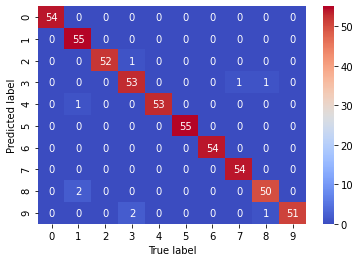

In [27]:
import seaborn as sns
cm = metrics.confusion_matrix(y_true=label_test, y_pred=preds)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

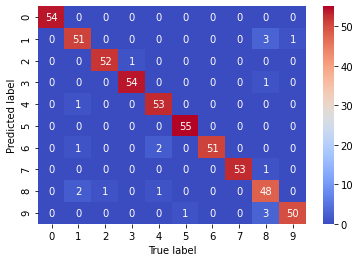

In [28]:
# Affichez la matrice de confusion de la regression logistique régularisée.
import seaborn as sns
cm = metrics.confusion_matrix(y_true=label_test, y_pred=pip.predict(data_test))
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

## Visualisation, sélection de modèle

### Visualisation des prédictions

Si l'on utilise les deux premières composantes principales du jeu de données pour apprendre un classifieur k-NN, 
on peut représenter comment se 'comporte' l'algorithme en prédisant les labels de points interpolés entre les points du jeu d'entrainement:

[[-0.91634395 -0.90173167]
 [ 0.38166463 -2.06093558]
 [ 1.31578382  1.17164424]
 ...
 [-0.3250065   0.1740755 ]
 [-0.9897958  -1.21883734]
 [-0.62820024 -1.30546399]]


C:\Users\Florent\miniconda3\envs\envML2020\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


(-3.1026086067899943, 3.317391393210011)

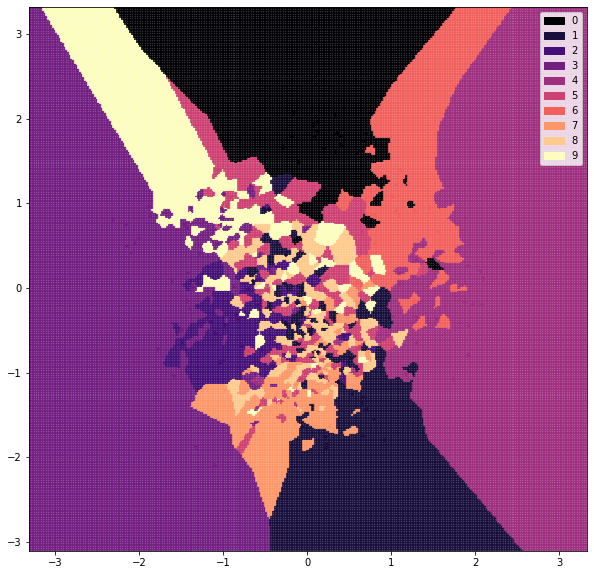

In [62]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
import matplotlib.patches as mpatches

# problème de normalisation ?

# On calcule les composantes principales du jeu de données, on le projette ensuite sur ses deux premiers axes.
pca = PCA(n_components=2, whiten=True)
X = pca.fit_transform(data_train)
print(X)

# On apprend un classifieur 1-NNC sur les deux premières composantes de chaque point de 'digits'
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X=X, y=label_train)

## On veut représenter la prédiction du knn : 
## pour cela on prédit sur un ensemble assez dense de coordonnées autour des points d'entrainement.
## On colorera ces points en fonction de la prédiction du modèle

h = .02 # Définit l'écart entre les points de la grille
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.cm.get_cmap('magma', 10)
Z = knnc.predict(np.c_[xx.ravel(), yy.ravel()]) #Prédiction d'un ensemble de points du plan des composantes principales.
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
im=plt.pcolormesh(xx, yy, Z, cmap='magma',alpha=.8)
plt.legend([mpatches.Patch(color=cmap(l)) for l in range(10)], [str(l) for l in range(10)])

# On affiche un échantillon des points du jeu d'entrainement
sample = np.random.choice(X.shape[0], size=250)
plt.scatter(X[sample, 0], X[sample, 1], color=cmap(label_train[sample]), marker='+', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

On peut ainsi visualiser l'effet du paramètre `n_neighbors` sur la prédiction du modèle:

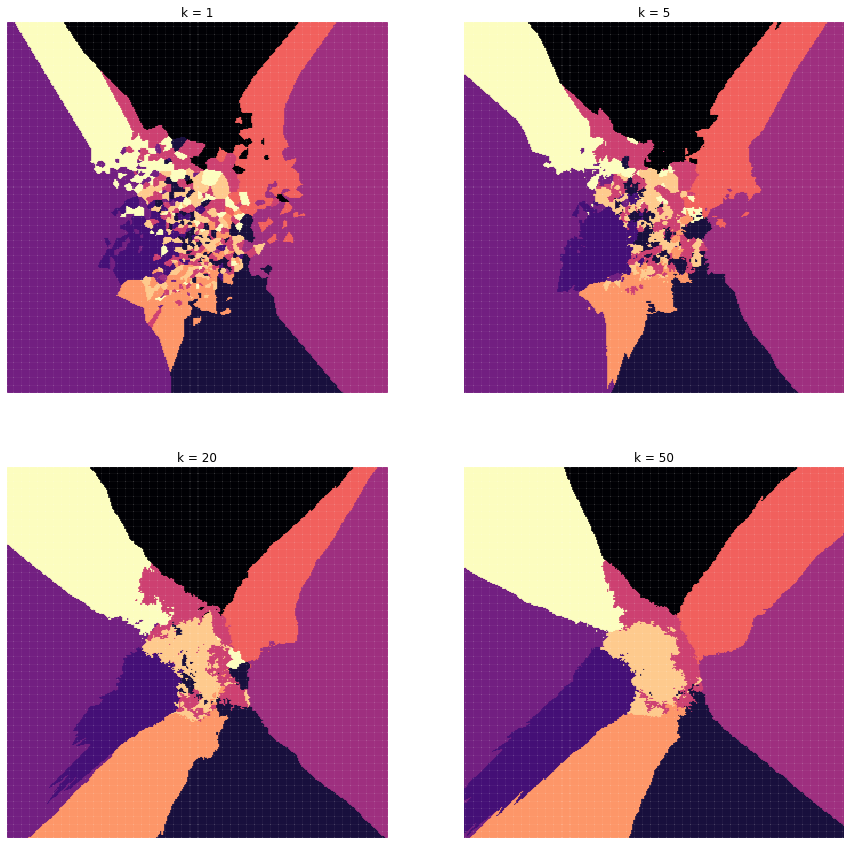

In [35]:
plt.figure(figsize=(15,15))

# On va afficher les prédictions du plan des composantes principales en fonction de n_neighbors.
for o,k in enumerate([1, 5, 20, 50], 1):
    knnc = KNeighborsClassifier(n_neighbors=k)
    knnc.fit(X=X, y=label_train)
    Z = knnc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(2, 2, o)
    ax.pcolormesh(xx, yy, Z, cmap='magma',alpha=.8, shading='auto')
    ax.set_title('k = {}'.format(k))
    ax.set_axis_off()

**Question:**

> Quelle est la classe d'hypothèse du 1-plus-proche-voisin ?

**Réponse:**

*Cf correction* : diagramme de Voronoi, espace des hypothèses. 
Le 1kNN sélection et colore (10c) un diagramme de Voronoi sur l'espace des données d'entrée. La classe d'hypothèse du 1kNN peut être décrite par l'ensemble des diagrmames de Voronoi colorés de 10 couleurs.

C'est la classe du point le plus proche qui sera retournée en résultat.

Essayez de représenter l'impact de $C$ sur l'apprentissage avec la régression logistique régularisée.

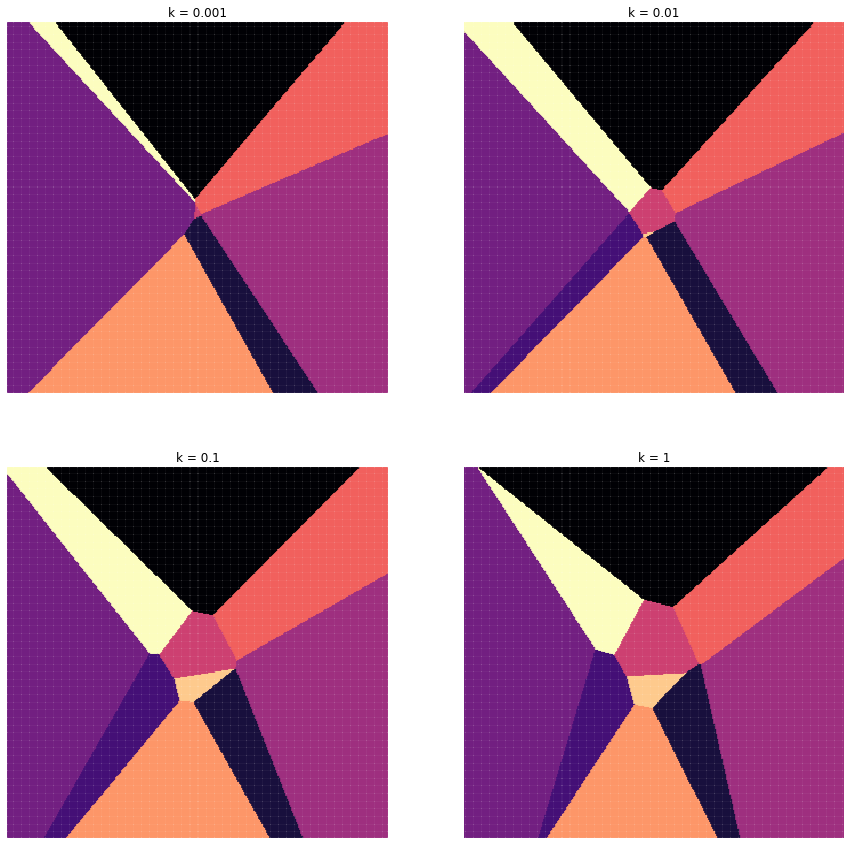

In [40]:
plt.figure(figsize=(15,15))

# On va afficher les prédictions du plan des composantes principales en fonction de C.
for o,k in enumerate([0.001, 0.01, 0.1, 1], 1):
    C = k
    penalty='l2'
    lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
    pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

    # Apprenez et testez la regression logistique régularisée (précedeée d'une normalisation des données):
    pip.fit(X=X, y=label_train)
    #pip.score(data_test, label_test)
    Z = pip.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(2, 2, o)
    ax.pcolormesh(xx, yy, Z, cmap='magma',alpha=.8, shading='auto')
    ax.set_title('C = {}'.format(k))
    ax.set_axis_off()

> Qu'observez-vous ? 

4 graphiques. Les séparations semblent plus nettes qu'avec la méthode des plus proches voisins. Quand C est très petit, certaines classes ne sont plus représentées.

Que deux paramètres, peu de régularisation

## Sélection de modèle

On cherche à trouver le meilleur hyper paramètre `C` ou `n_neighbors`.
Pour ce faire on peut effectuer une `grid search` : on va brutalement tester tous les hyperparamètres d'une liste (`grid` s'il y a plusieurs paramètres).
On cherche à choisir le paramètre qui maximise les performances du modèle en généralisation. Un proxy pour cette performance est la performance estiméee sur le `test set`.
Cependant, de la même façon qu'il est possible de surapprendre un jeu d'entrainement, il est possible de sur-apprendre un jeu de test par la sélection de l'hyperparamètre: l'hyperparamètre apporterait alors de bonnes performances pour ce jeu de test précis.

Pour éviter celà au maximum, on va utiliser une `validation croisée`.

![](crossval.001.jpeg)

Dans cette illustration, la meilleure performance moyenne est rapportée par les modèles paramétrés par $\text{n_neighbors}=2$. On sélectionne donc cet hyeraramètre la.

En pratique, on utilise [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Comme les autres estimateurs de sklearn, il faut instancier GridSearchCV et utiliser sa méthode `fit`.

Les paramètres principaux du GridSearchCV sont :

* `estimator` : le modèle de classification utilisé
* `param_grid` : dictionnaire des hyperparamètres à tester. Les clés de ce dictionnaire sont de type `str` et correspondent exactement au nom du paramètre utilisé pour instancier `estimator`
* `scoring`: définit selon quelle mesure sont sélectionnés les hyperparamètres.
* `cv`: définit le nombre de sous-divisions du jeu de donnée

Comme une selection (et donc une forme d'apprentissage) est faite à l'aide du jeu de validation, il nous faut conserver un jeu de set finale, sur lequel on pourra calculer la vraie performance de généralisation du modèle.
Il convient donc d'appliquer la validation croisée sur `data_train`.

Une fois "fitté" on a accès aux résultats grace à l'attribut `.cv_results_`.
On peut aussi utiliser les méthodes `score` ou encore `predict`, qui reviennent à utiliser le meilleur modèle.

In [47]:
from sklearn.model_selection import GridSearchCV

## Cherchez le meilleur paramètre n_neighbors pour l'algorithme
## des k-plus proches voisins: GridSearchCV pour le k-NNC
knngs = KNeighborsClassifier()
lst = list(range(1,10,1))
parameters = {'n_neighbors': lst}
clf = GridSearchCV(knngs, parameters)
clf.fit(data_train, label_train)
print(clf.cv_results_)
print(clf.best_params_)
print(clf.best_score_)

{'mean_fit_time': array([0.01098084, 0.00862675, 0.00888658, 0.00953145, 0.00868526,
       0.00932093, 0.00967112, 0.00888176, 0.00890026]), 'std_fit_time': array([0.00205101, 0.00034836, 0.00079829, 0.00066656, 0.00033665,
       0.00085669, 0.00072413, 0.00077444, 0.0007558 ]), 'mean_score_time': array([0.02305188, 0.02220783, 0.02613282, 0.02332468, 0.02334433,
       0.02274923, 0.02519341, 0.02493644, 0.02440743]), 'std_score_time': array([0.00215473, 0.00045976, 0.00326123, 0.00076655, 0.00067051,
       0.00085556, 0.00273206, 0.00237507, 0.00086657]), 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}], 'split0_test_score': 

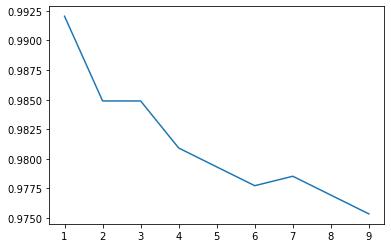

In [48]:
## Représentez (d'une manière ou d'une autre) l'évolution des performances de validation 
## en fonction de n_neighbors.
plt.plot(lst,clf.cv_results_['mean_test_score']) 

In [58]:
from sklearn.model_selection import GridSearchCV
stsc = StandardScaler()
data_trainN = stsc.fit_transform(data_train)
data_testN = stsc.transform(data_test)
# Normaliser par rapport à quel ensemble ?
## Cherchez le meilleur paramètre C pour l'algorithme
## de la régression logistique régularisée

penalty='l2'
lregC = LogisticRegression(penalty=penalty, max_iter=200)
#pipC = Pipeline([('scaler', StandardScaler()), ('lreg', lregC)])

lstC = list([10**i for i in range(-5,4)])
parameters2 = {'C': lstC}
clf2 = GridSearchCV(lregC, parameters2)
clf2.fit(data_trainN, label_train)
print(clf2.cv_results_)
print(clf2.best_params_)
print(clf2.best_score_)

{'mean_fit_time': array([0.02146411, 0.01119423, 0.0138309 , 0.02197213, 0.03749752,
       0.07073011, 0.11096435, 0.09988761, 0.08860974]), 'std_fit_time': array([0.01099423, 0.00069516, 0.00068602, 0.00061466, 0.0013698 ,
       0.00513358, 0.01426197, 0.00486536, 0.00915625]), 'mean_score_time': array([0.        , 0.        , 0.        , 0.00021544, 0.        ,
       0.00022111, 0.00047922, 0.00042892, 0.00026183]), 'std_score_time': array([0.        , 0.        , 0.        , 0.00043087, 0.        ,
       0.00044222, 0.00058819, 0.00052593, 0.00052366]), 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.5       , 0.83730159, 0.90873016, 0.9523809

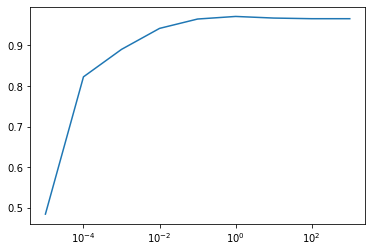

In [59]:
## Représentez (d'une manière ou d'une autre) l'évolution des performances de validation 
## en fonction de C.
plt.plot(lstC,clf2.cv_results_['mean_test_score'])
plt.xscale('log')

**Questions:** 
> Expliquez l'effet de ces deux hyperparamètres sur l'apprentissage.

**Réponse**:

Choisir le meilleur hyperparamètre permet d'améliorer les performances du modèle. En effet, quand il y a trop de plus proches voisins, le modèle est moins bon : le premier plus proche voisin est donc le meilleur choix. Pour la régression logistique, les performances diminuent quand C est trop petit ou trop grand : il ne faut donc ni trop régulariser, ni pas assez.

On veut finalement choisir quel modèle utiliser entre le meilleur des k-NNC et des régressions logistiques régularisées. 

**Questions:**

> Comment comparer et sélectionner entre ces deux modèles ? \
> Comment finir d'évaluer le résultat de cette sélection ?

**Réponses:**

Pour comparer et sélectionner les deux modèles, on peut se baser sur un jeu de validation, mais li n'y a pas pour l'instant. On pourrait séperer le jeu de tests en deux.
Ainsi, en comparant les meilleurs scores issus de Grid Search, on sélectionne le modèle 1-NNC.

Pour finir d'évaluer le résultat de la sélection, on utilise le jeu de test.

In [60]:
# Sélection et évaluation du modèle final.

print(clf.best_estimator_.score(data_test, label_test))
print(clf2.best_estimator_.score(data_testN, label_test))

0.9888888888888889
0.9629629629629629


Les résultats sont sans appel. Le modèle de 1-NNC donne les meilleurs résultats (score supérieur de +2.5% par rapport à la régression logistique régularisée avec C=1).